In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import the csv file
crime = pd.read_csv('crime_against_women_india.csv') 

In [3]:
crime.head()

,Area_Name,Year,Group_Name,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,...,Cases_Pending_Investigation_at_Year_End,Cases_Pending_Investigation_from_previous_year,Cases_Pending_Trial_at_Year_End,Cases_Pending_Trial_from_the_previous_year,Cases_Reported,Cases_Sent_for_Trial,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial
0,Andaman & Nicobar Islands,2001,Rape,5,2,3,0,0,0,5,...,1,3,34,36,3,3,5,0,0,39
1,Andhra Pradesh,2001,Rape,731,22,769,35,197,74,791,...,393,390,1974,2170,871,769,928,2,0,2937
2,Arunachal Pradesh,2001,Rape,1,2,25,0,2,0,27,...,18,12,282,260,33,25,3,0,0,285
3,Assam,2001,Rape,334,95,495,10,101,45,590,...,1045,863,1964,1914,817,495,435,0,0,2409
4,Bihar,2001,Rape,406,141,685,0,155,105,826,...,488,531,3185,3061,888,685,561,0,0,3746


In [4]:
#To get an overall view of the datas included in the file
print("Columns included in the dataset:\n")
for i in crime.columns:
    print(i)

Columns included in the dataset:

Area_Name
Year
Group_Name
Cases_Acquitted_or_Discharged
Cases_charge_sheets_were_not_laid_but_Final_Report_submitted
Cases_Chargesheeted
Cases_Compounded_or_Withdrawn
Cases_Convicted
Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law
Cases_Investigated_Chargesheets+FR_Submitted
Cases_not_Investigated_or_in_which_investigation_was_refused
Cases_Pending_Investigation_at_Year_End
Cases_Pending_Investigation_from_previous_year
Cases_Pending_Trial_at_Year_End
Cases_Pending_Trial_from_the_previous_year
Cases_Reported
Cases_Sent_for_Trial
Cases_Trials_Completed
Cases_Withdrawn_by_the_Govt
Cases_withdrawn_by_the_Govt_during_investigation
Total_Cases_for_Trial


In [5]:
#Print the groups we consider under 'crime against women' category
c_group=crime['Group_Name'].unique()
print("Basic groups under crime against women:\n")
for i in c_group: 
    print(i)

Basic groups under crime against women:

Rape
Kidnapping & Abduction - Women & Girls
Dowry Deaths
Molestation
Sexual harassment
Cruelty by Husband and Relatives


In [6]:
#Print the names of states or Union Territories for which the datas are considered
states=crime['Area_Name'].unique()
print("Areas recognised for the crime categories:\n \n",states)

Areas recognised for the crime categories:
 
 ['Andaman & Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra & Nagar Haveli' 'Daman & Diu'
 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [7]:
#Print the period in which the data is collected
Yr=crime['Year'].unique()
print("Data considered during the period from year %d to year %d" %(min(Yr),max(Yr)))

Data considered during the period from year 2001 to year 2010


In [8]:
#Check if there is any NAN values in the data
crime.isnull().any().any()

False

In [9]:
#Check the datatypes of each column
crime.dtypes

Area_Name                                                       object
Year                                                             int64
Group_Name                                                      object
Cases_Acquitted_or_Discharged                                    int64
Cases_charge_sheets_were_not_laid_but_Final_Report_submitted     int64
Cases_Chargesheeted                                              int64
Cases_Compounded_or_Withdrawn                                    int64
Cases_Convicted                                                  int64
Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law     int64
Cases_Investigated_Chargesheets+FR_Submitted                     int64
Cases_not_Investigated_or_in_which_investigation_was_refused     int64
Cases_Pending_Investigation_at_Year_End                          int64
Cases_Pending_Investigation_from_previous_year                   int64
Cases_Pending_Trial_at_Year_End                                  int64
Cases_

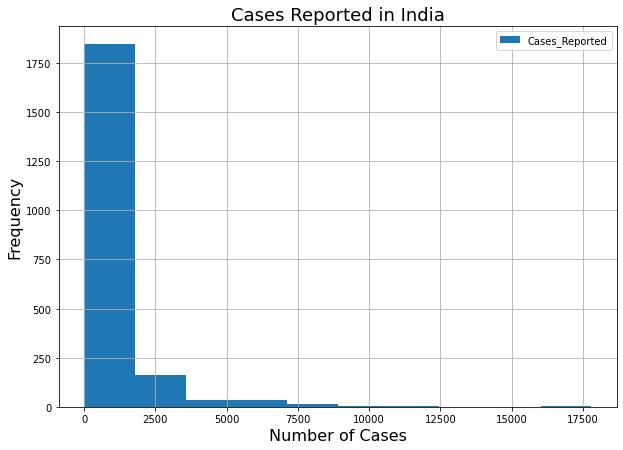

In [10]:
#'''Rename the column name 'Area_Name' to 'Area' and 'Group_Name' to 'Group' in the
#dataframe 'crime' '''
crime.rename(columns={'Area_Name':'Area','Group_Name':'Group'}, inplace=True)

crime=crime.set_index('Year')                         #set index of the dataframe as year
plt.figure(figsize=(10,7))                            #set figure size

#plot a histogram for the no. of reported cases
crime['Cases_Reported'].hist(legend=True); 

plt.title('Cases Reported in India',fontsize=18);     #set title of the figure
plt.xlabel('Number of Cases',fontsize=16);            #set the label for the x-axis
plt.ylabel('Frequency',fontsize=16);                  #set the label for the y-axis

In [11]:
#Get the average number of reported cases in each area
Mean_crime=crime.groupby('Area')['Cases_Reported'].mean()
Mean_crime

Area
Andaman & Nicobar Islands       7.916667
Andhra Pradesh               3184.400000
Arunachal Pradesh              27.633333
Assam                        1142.766667
Bihar                        1015.100000
Chandigarh                     28.766667
Chhattisgarh                  628.016667
Dadra & Nagar Haveli            3.533333
Daman & Diu                     1.283333
Delhi                         616.250000
Goa                            15.150000
Gujarat                      1153.416667
Haryana                       749.083333
Himachal Pradesh              146.333333
Jammu & Kashmir               376.733333
Jharkhand                     403.483333
Karnataka                     854.983333
Kerala                       1145.433333
Lakshadweep                     0.300000
Madhya Pradesh               2505.900000
Maharashtra                  2225.583333
Manipur                        27.266667
Meghalaya                      24.866667
Mizoram                        22.633333
Nagaland   

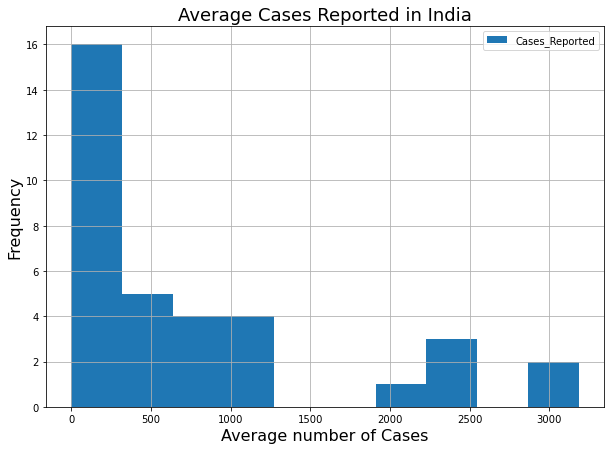

In [12]:
#Plot a histogram for the average number of cases reported in each area
Mean_crime.hist(legend=True,figsize=(10,7)); 

plt.title('Average Cases Reported in India',fontsize=18);   #set title of the figure
plt.xlabel('Average number of Cases',fontsize=16);          #set the label for the x-axis
plt.ylabel('Frequency',fontsize=16);                        #set the label for the y-axis

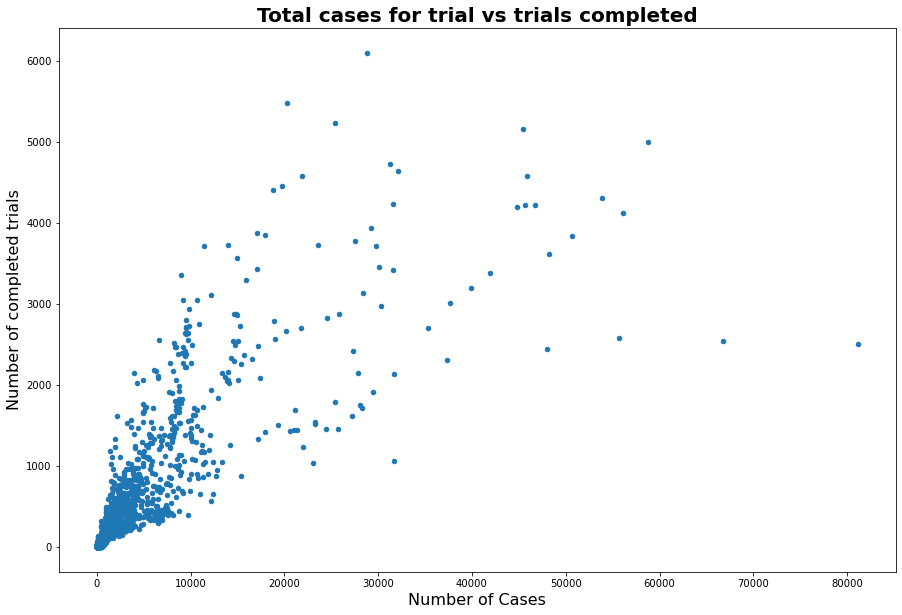

In [13]:
#Plot a scatter diagram for Total Cases for Trial against number of trials completed
crime.plot(x='Total_Cases_for_Trial',y='Cases_Trials_Completed',kind='scatter',figsize=(15,10));

plt.title('Total cases for trial vs trials completed',fontsize=20,weight='bold');  #set title
plt.xlabel('Number of Cases',fontsize=16);                                         #set the label for the x-axis
plt.ylabel('Number of completed trials',fontsize=16);                              #set the label for the y-axis

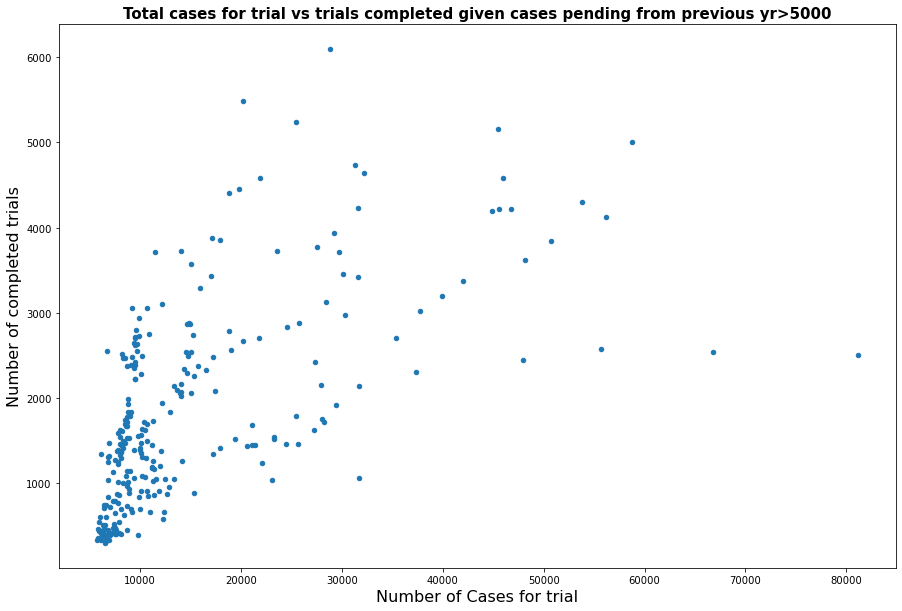

In [14]:
#'''Plot a scattered diagram for total cases against no of completed trials over the years in which the no. of 
#pending trials from previous year is greater than 5000'''

crime[crime['Cases_Pending_Trial_from_the_previous_year']>5000].plot(x='Total_Cases_for_Trial',\
                                                        y='Cases_Trials_Completed',kind='scatter',figsize=(15,10));

plt.title('Total cases for trial vs trials completed given cases pending from previous yr>5000',\
                                                                                  fontsize=15,weight='bold');
plt.xlabel('Number of Cases for trial',fontsize=16);
plt.ylabel('Number of completed trials',fontsize=16);

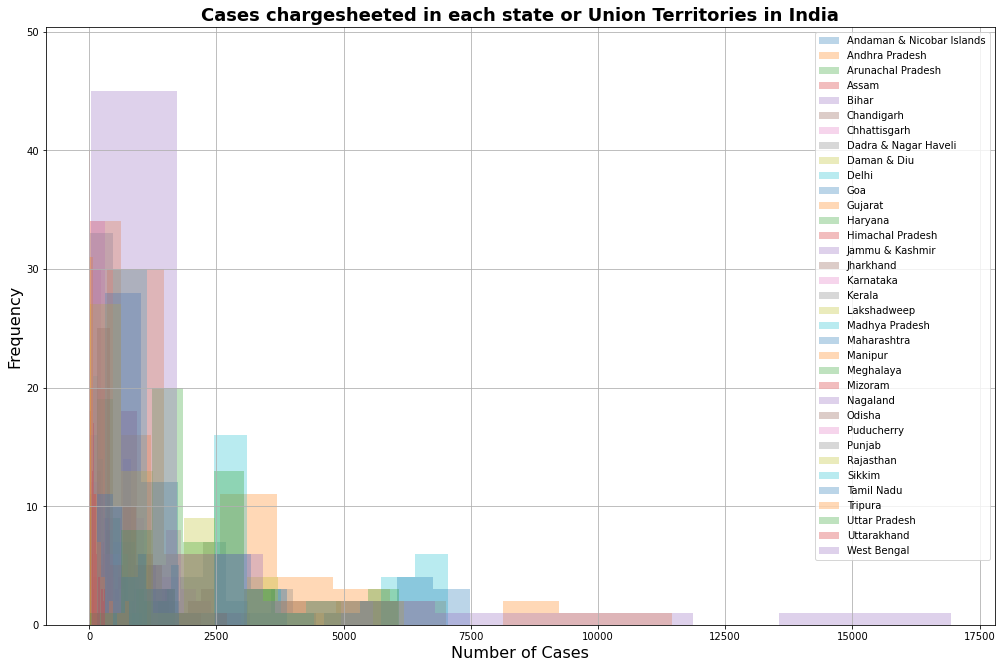

In [15]:
#'''Plot a histogram showing the number of chargesheeted cases in each state or UT
plt.figure(figsize=(17,11))
crime.groupby('Area')['Cases_Chargesheeted'].hist(legend=True,alpha=0.3);
plt.title('Cases chargesheeted in each state or Union Territories in India',weight='bold',fontsize=18);
plt.xlabel('Number of Cases',fontsize=16);
plt.ylabel('Frequency',fontsize=16);

In [16]:
#Create a dataframe with the columns Area, Group and Cases_Pending_Investigation_from_previous_year
crime_G1=crime[['Area','Group','Cases_Pending_Investigation_from_previous_year']]

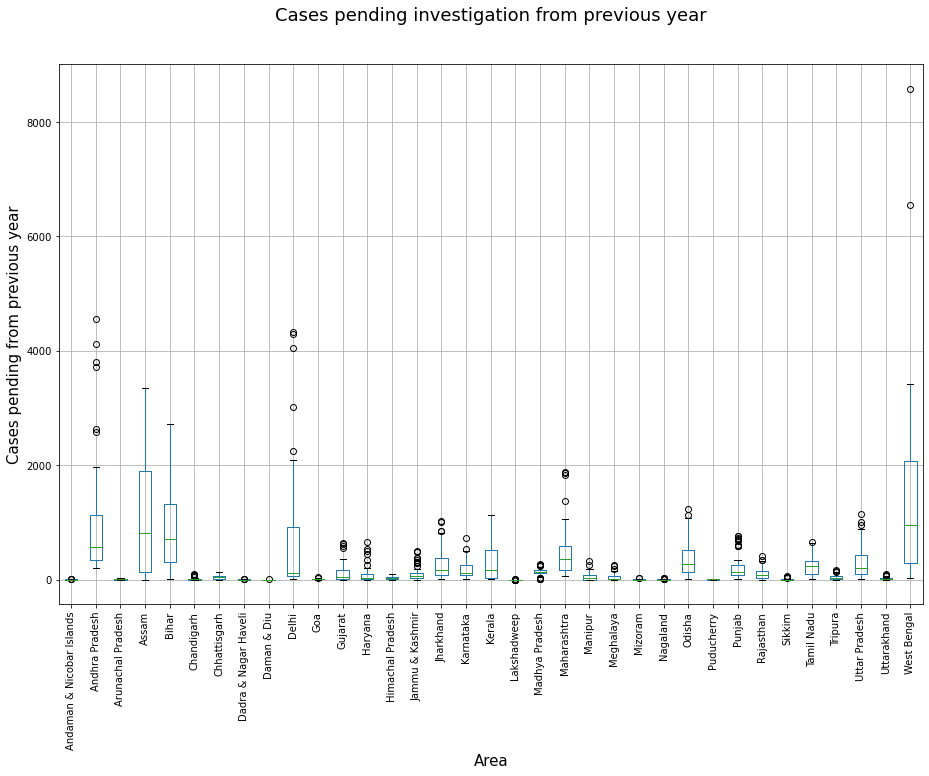

In [17]:
#Generate a boxplot grouped by 'Area' to compare the difference in number of pending cases
ax=crime_G1.boxplot(column=['Cases_Pending_Investigation_from_previous_year'], by = 'Area', figsize=(15,10),fontsize=10)

ax.set_xlabel("Area",fontsize=15)                                            #Replace the default x-label                                  
ax.set_ylabel("Cases pending from previous year",fontsize=15)                #To set y-label           
ax.set_title(" ")                                                            #Remove the default title                                                       


fig = ax.get_figure()                                                        #Return the figure instance  
fig.suptitle('Cases pending investigation from previous year',fontsize=18)   #Replace the default suptitle

plt.xticks(rotation=90);                                                     #Rotate the x-ticks

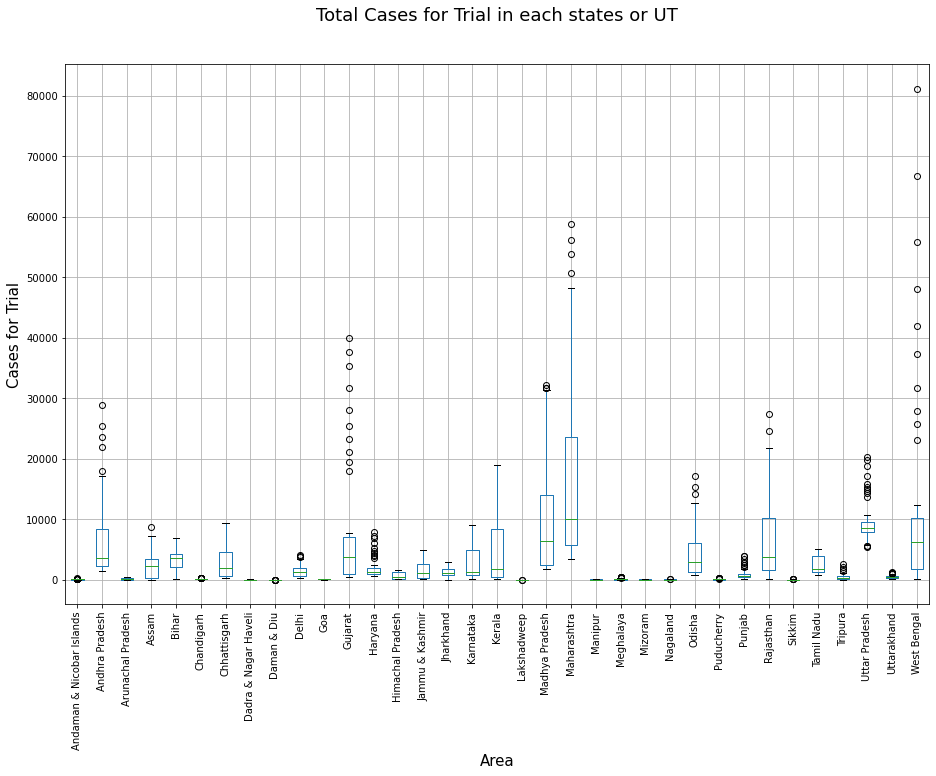

In [18]:
#Create a dataframe with the columns Area, Total_Cases_for_Trial
crime_G2=crime[['Area','Group','Total_Cases_for_Trial']]

#Generate a boxplot grouped by 'Area' to compare the total cases for trial
ax=crime_G2.boxplot(column=['Total_Cases_for_Trial'], by = 'Area',figsize=(15,10),fontsize=10)

ax.set_xlabel("Area",fontsize=15)                                        #Replace the default x-label
ax.set_ylabel("Cases for Trial",fontsize=15)                             #To set y-label
ax.set_title(" ")                                                        #Remove the default title

fig = ax.get_figure()                                                    #Return the figure instance
fig.suptitle('Total Cases for Trial in each states or UT',fontsize=18)   #Replace the default suptitle
plt.xticks(rotation=90);                                                 #Rotate the x-ticks

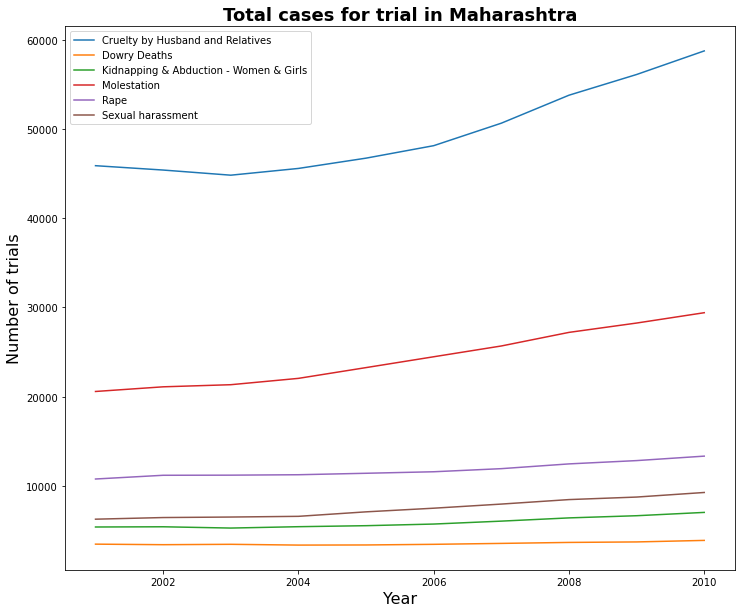

In [19]:
#Plot diagram to show the no of cases for trial in Maharashtra grouped by the categories of crime
fig = plt.figure(figsize=(12,10));
ax=plt.gca();
  
crime_G21=crime[crime['Area']=='Maharashtra']                                #dataframe with datas from Maharashtra
crime_G21=crime_G21.sort_index()                                             #sort index
crime_G21.groupby('Group')['Total_Cases_for_Trial'].plot(legend=True);       #plot - grouped by the column 'Group'
plt.title('Total cases for trial in Maharashtra',weight='bold',fontsize=18);
plt.xlabel('Year',fontsize=16);
plt.ylabel('Number of trials',fontsize=16);

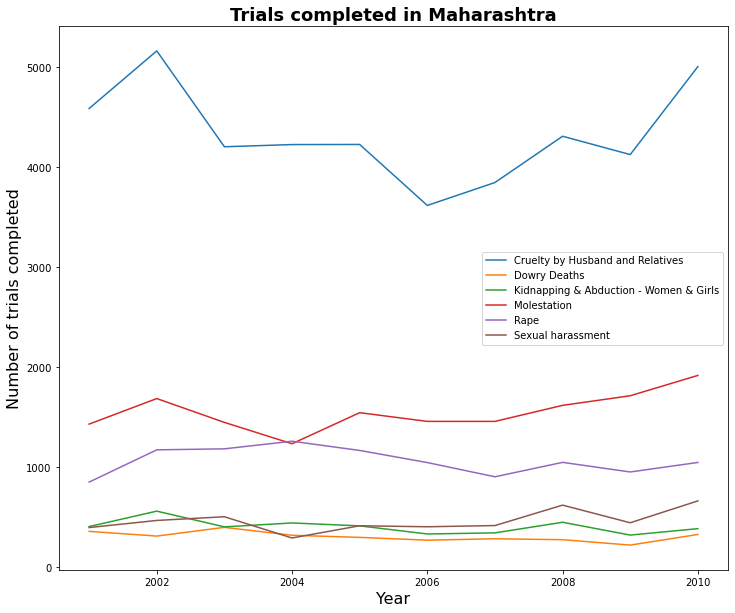

In [20]:
#crime_G21[crime_G21['Group']=='Cruelty by Husband and Relatives']['Cases_Trials_Completed'].plot(legend=True);
fig = plt.figure(figsize=(12,10));
crime_G21.groupby('Group')['Cases_Trials_Completed'].plot(legend=True); 
plt.title('Trials completed in Maharashtra',weight='bold',fontsize=18);
plt.xlabel('Year',fontsize=16);
plt.ylabel('Number of trials completed',fontsize=16);

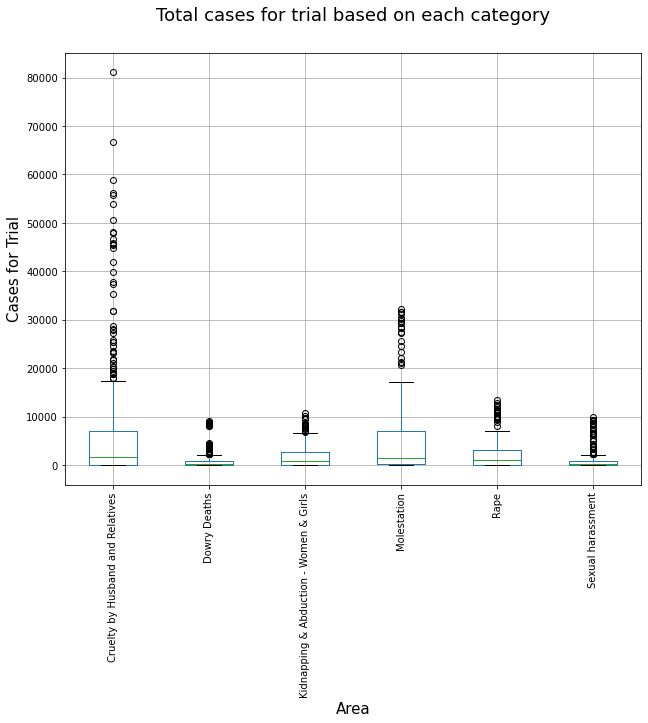

In [21]:
#Box plot to compare the number of cases for trial in each category of the crime
ax=crime_G2.boxplot(column=['Total_Cases_for_Trial'], by = 'Group', figsize=(10,8),fontsize=10)

ax.set_xlabel("Area",fontsize=15)                                            #Replace the default x-label
ax.set_ylabel("Cases for Trial",fontsize=15)                                 #To set ylabel
ax.set_title(" ")                                                            #Remove the default title

fig = ax.get_figure()                                                        #Return the figure instance
fig.suptitle('Total cases for trial based on each category',fontsize=18)     #Replace the default suptitle
plt.xticks(rotation=90);  

In [22]:
#find minimum, maximum and average for number of cases acquitted or discharged grouped by 'Area' and 'Group'
t_sum=pd.DataFrame()
t_sum['minimum'] = crime.groupby(['Area','Group'])['Cases_Acquitted_or_Discharged'].min() #column for minimum
t_sum['maximum']= crime.groupby(['Area','Group'])['Cases_Acquitted_or_Discharged'].max()  #column for maximum
t_sum['mean'] = crime.groupby(['Area','Group'])['Cases_Acquitted_or_Discharged'].mean()   #column for mean

In [23]:
t_sum

minimum  \
Area                      Group                                             
Andaman & Nicobar Islands Cruelty by Husband and Relatives              0   
                          Dowry Deaths                                  0   
                          Kidnapping & Abduction - Women & Girls        0   
                          Molestation                                   1   
                          Rape                                          0   
...                                                                   ...   
West Bengal               Dowry Deaths                                139   
                          Kidnapping & Abduction - Women & Girls      209   
                          Molestation                                 350   
                          Rape                                        373   
                          Sexual harassment                            21   

                                                                  maximum  \
Area                      Group                                             
Andaman & Nicobar Islands Cruelty by Husband and Relatives              6   
                          Dowry Deaths                                  0   
                          Kidnapping & Abduction - Women & Girls        2   
                          Molestation                                   7   
                          Rape                                          5   
...                                                                   ...   
West Bengal               Dowry Deaths                                309   
                          Kidnapping & Abduction - Women & Girls      626   
                          Molestation                                 966   
                          Rape                                        767   
                          Sexual harassment                            61   

                                                                   mean  
Area                      Group                                          
Andaman & Nicobar Islands Cruelty by Husband and Relatives          2.3  
                          Dowry Deaths                              0.0  
                          Kidnapping & Abduction - Women & Girls    1.0  
                          Molestation                               3.6  
                          Rape                                      2.8  
...                                                                 ...  
West Bengal               Dowry Deaths                            219.4  
                          Kidnapping & Abduction - Women & Girls  373.3  
                          Molestation                             598.7  
                          Rape                                    588.6  
                          Sexual harassment                        39.9  

[210 rows x 3 columns]

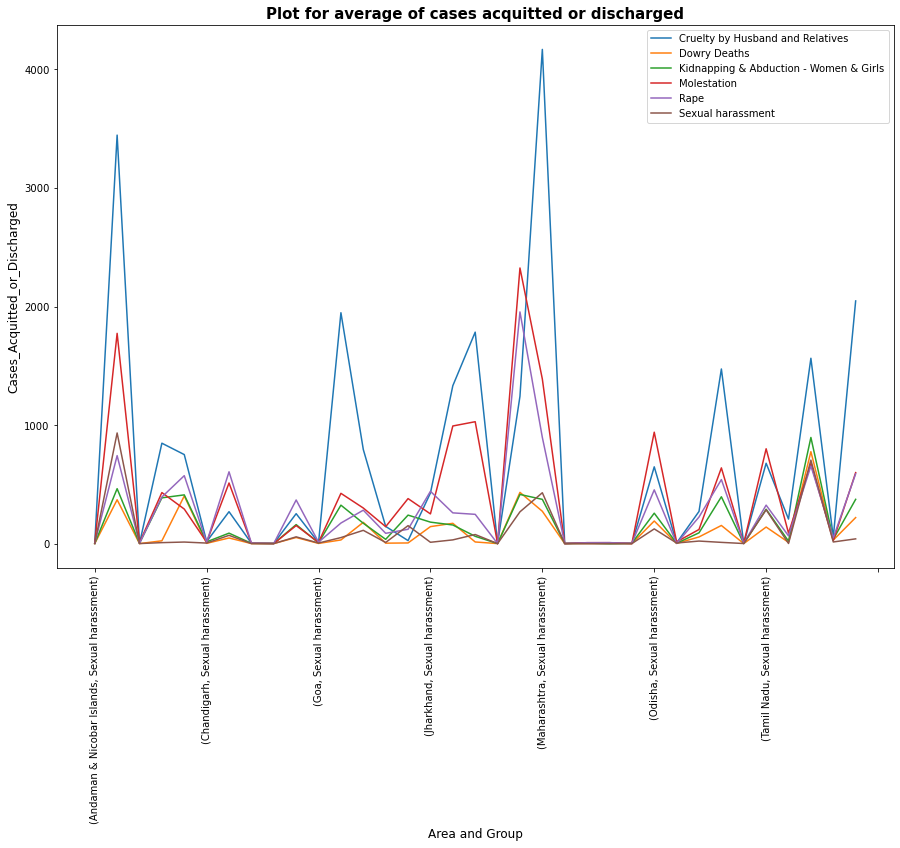

In [24]:
#Plot diagram for the average number of cases acquitted or discharged
t_sum.groupby('Group')['mean'].plot(legend=True,figsize=(15,10));

plt.title('Plot for average of cases acquitted or discharged',fontsize=15,weight='bold'); #Set title
plt.xlabel('Area and Group',fontsize=12);                                                 #Set label for X-axis
plt.ylabel('Cases_Acquitted_or_Discharged',fontsize=12);                                  #Set label for Y-axis
plt.xticks(rotation=90);                                                                  #Rotate the x-ticks

In [25]:
#Dataframe for the category 'Cruelty by Husband and Relatives'
crime_G2=crime[crime['Group']=='Cruelty by Husband and Relatives']

In [26]:
crime_G2.head()

,Area,Group,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,Cases_not_Investigated_or_in_which_investigation_was_refused,Cases_Pending_Investigation_at_Year_End,Cases_Pending_Investigation_from_previous_year,Cases_Pending_Trial_at_Year_End,Cases_Pending_Trial_from_the_previous_year,Cases_Reported,Cases_Sent_for_Trial,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial
Year,,,,,,,,,,,,,,,,,,,,
2001,Andaman & Nicobar Islands,Cruelty by Husband and Relatives,6,3,5,0,0,0,8,0,4,3,10,11,9,5,6,0,0,16
2001,Andhra Pradesh,Cruelty by Husband and Relatives,2956,114,4428,688,762,1168,4542,6,1862,1787,7017,6996,5791,4428,3718,1,0,11423
2001,Arunachal Pradesh,Cruelty by Husband and Relatives,0,2,8,0,1,0,10,0,2,1,22,15,11,8,1,0,0,23
2001,Assam,Cruelty by Husband and Relatives,255,325,585,71,42,92,910,0,1011,765,1857,1640,1248,585,297,0,0,2225
2001,Bihar,Cruelty by Husband and Relatives,397,165,1217,77,165,97,1382,0,816,737,2751,2173,1558,1217,562,0,0,3390


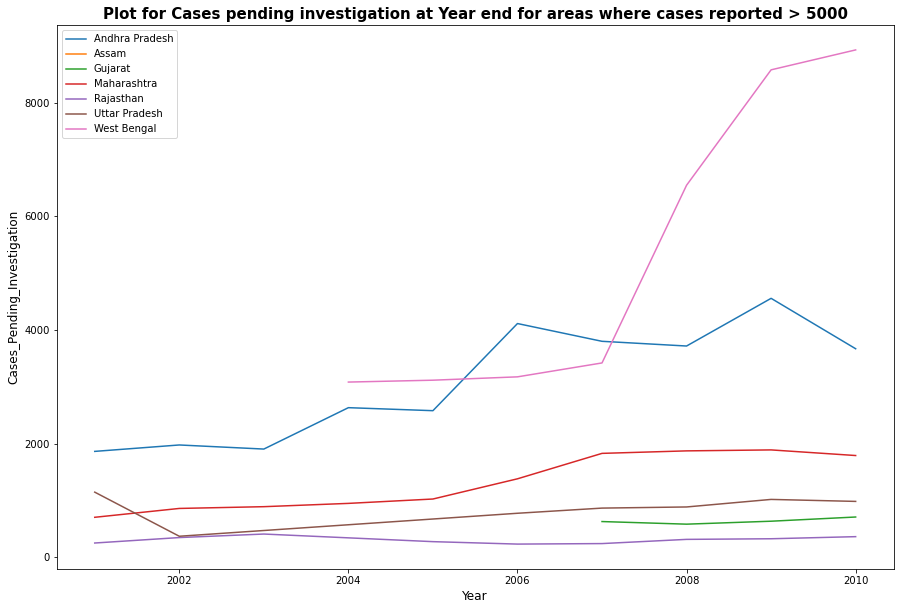

In [27]:
#'''Plot line diagram for number of cases pending investigation at year end for areas where number 
#of reported cases are greater than 5000'''
crime_G2[crime_G2['Cases_Reported']>5000].groupby(['Area'])['Cases_Pending_Investigation_at_Year_End'].plot\
                                                                                    (legend=True,figsize=(15,10))

#Set title and labels for X and Y axis
plt.title('Plot for Cases pending investigation at Year end for areas where cases reported > 5000',\
                                                                                        fontsize=15,weight='bold');

plt.xlabel('Year',fontsize=12);
plt.ylabel('Cases_Pending_Investigation',fontsize=12);

In [28]:
#'''Generate a dataframe with columns 'Area', 'Group','Cases_Pending_Trial_from_the_previous_year' &
#'Total_Cases_for_Trial' '''
crime_G3=crime[['Area','Group','Cases_Pending_Trial_from_the_previous_year','Total_Cases_for_Trial']]

X=crime_G3['Cases_Pending_Trial_from_the_previous_year']
Y=crime_G3['Total_Cases_for_Trial']

In [29]:
crime_G3

,Area,Group,Cases_Pending_Trial_from_the_previous_year,Total_Cases_for_Trial
Year,,,,
2001,Andaman & Nicobar Islands,Rape,36,39
2001,Andhra Pradesh,Rape,2170,2937
2001,Arunachal Pradesh,Rape,260,285
2001,Assam,Rape,1914,2409
2001,Bihar,Rape,3061,3746
...,...,...,...,...
2010,Tamil Nadu,Cruelty by Husband and Relatives,3775,4940
2010,Tripura,Cruelty by Husband and Relatives,1805,2586
2010,Uttar Pradesh,Cruelty by Husband and Relatives,14457,20233


In [30]:
X.dtype

dtype('int64')

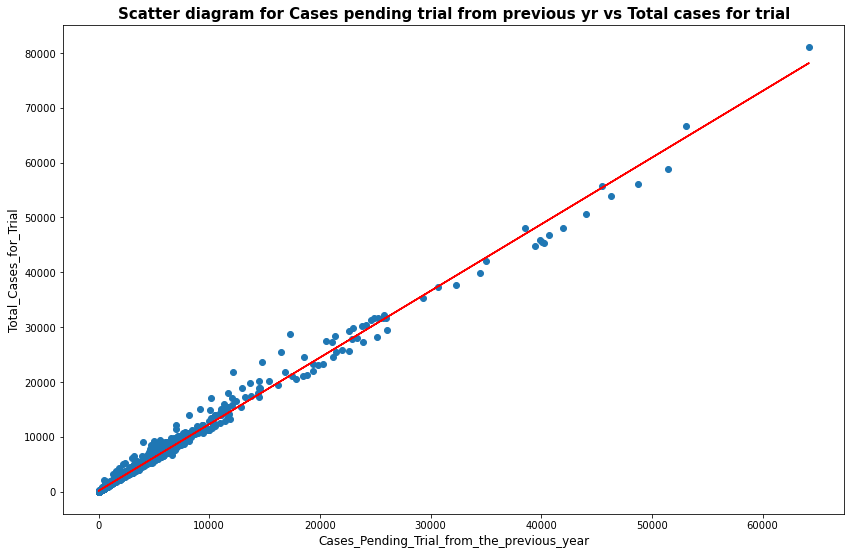

In [31]:
[m,b]=np.polyfit(X,Y,1)                                    #find a linear model    
y=m*X+b                                                    #find y using the new values of m and b

#Plot the linear model along with the points X and Y
plt.figure(figsize=(14,9))
plt.scatter(X,Y)
plt.plot(X,y,'r');
plt.title('Scatter diagram for Cases pending trial from previous yr vs Total cases for trial',fontsize=15,\
                                                                                                 weight='bold');
plt.xlabel('Cases_Pending_Trial_from_the_previous_year',fontsize=12);
plt.ylabel('Total_Cases_for_Trial',fontsize=12);

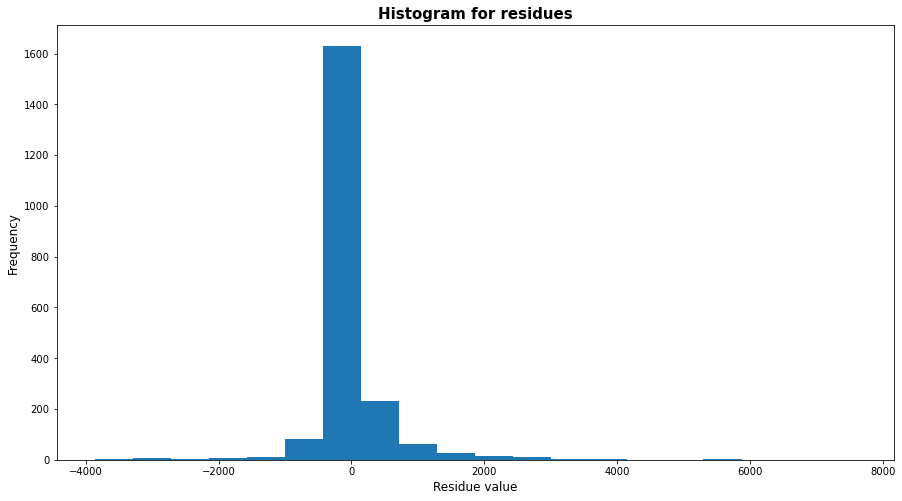

In [32]:
#Find residue and plot a histogram 
res=Y-y
plt.figure(figsize=(15,8))
plt.hist(res,20);
plt.title('Histogram for residues',fontsize=15,weight='bold');
plt.xlabel('Residue value',fontsize=12);
plt.ylabel('Frequency',fontsize=12);

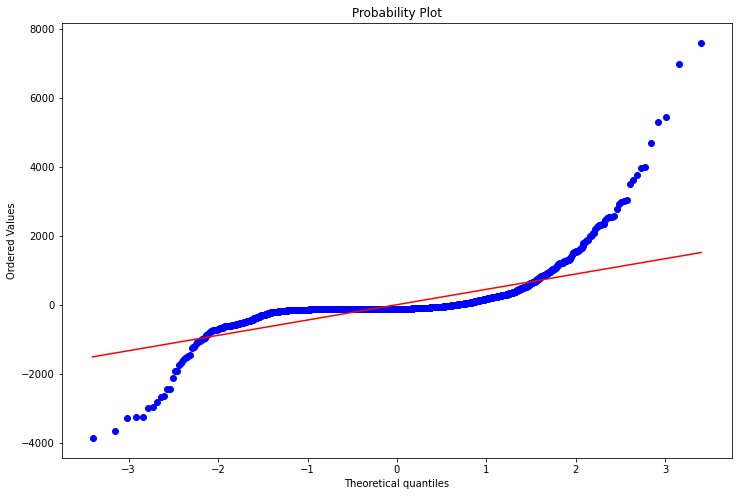

In [33]:
import scipy.stats as st
plt.figure(figsize=(12,8))
st.probplot(res,plot=plt);                #Probability Plot

In [34]:
#Define a function to calculate the hinges
def hinges(x):
    upper = x.quantile(0.75)  
    lower = x.quantile(0.25) 
    return lower,upper

In [35]:
#Calculate the hinges of the residue and derive the lower and upper fence
[Q1,Q3]=hinges(res)               
iqr = Q3 - Q1                     
lower_fence=Q1-1.5*iqr            
upper_fence=Q3+1.5*iqr           

In [36]:
#Add the residue values as a column in the dataframe
crime_G3['res']=res

/var/folders/7b/82q5vs457jv0m32z7g937tp80000gn/T/ipykernel_21218/3193605091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_G3['res']=res


In [37]:
crime_G3.head()

,Area,Group,Cases_Pending_Trial_from_the_previous_year,Total_Cases_for_Trial,res
Year,,,,,
2001,Andaman & Nicobar Islands,Rape,36,39,-138.882394
2001,Andhra Pradesh,Rape,2170,2937,165.419461
2001,Arunachal Pradesh,Rape,260,285,-165.135620
2001,Assam,Rape,1914,2409,-51.433995
2001,Bihar,Rape,3061,3746,-108.516362


In [38]:
#Remove the outliers
CG3=crime_G3[(crime_G3['res']>lower_fence)&(crime_G3['res']<upper_fence)] 
CG3=CG3.drop(columns=['res']) 
X1=CG3['Cases_Pending_Trial_from_the_previous_year']
Y1=CG3['Total_Cases_for_Trial']

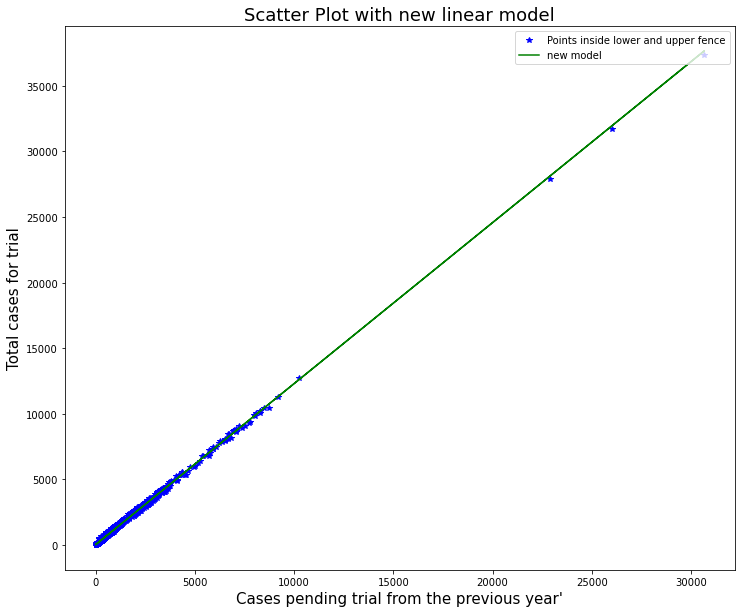

In [39]:
[m_new,b_new]=np.polyfit(X1,Y1,1)                                          #find the new linear model
y_new=m_new*X1+b_new                                                       #find y using the new values of m and b

Y2=crime_G3[(crime_G3['res']<=lower_fence)|(crime_G3['res']>=upper_fence)] #find the outliers 
plt.figure(figsize=(12,10));                                               #Set figure size

#Plot graph with outliers in red and Y values as blue stars, along with new and original model
a=plt.plot(X1,Y1, 'b*', label="Points inside lower and upper fence");
d=plt.plot(X1,y_new,'g',label='new model');  

plt.title('Scatter Plot with new linear model',fontsize=18);               #Set Title
plt.xlabel("Cases pending trial from the previous year'",fontsize=15);     #Set label for X-axis                                              #Set label for X-axis
plt.ylabel("Total cases for trial",fontsize=15);                           #Set label for Y-axis

plt.legend(loc='upper right');                                             #Place a legend in the specified location

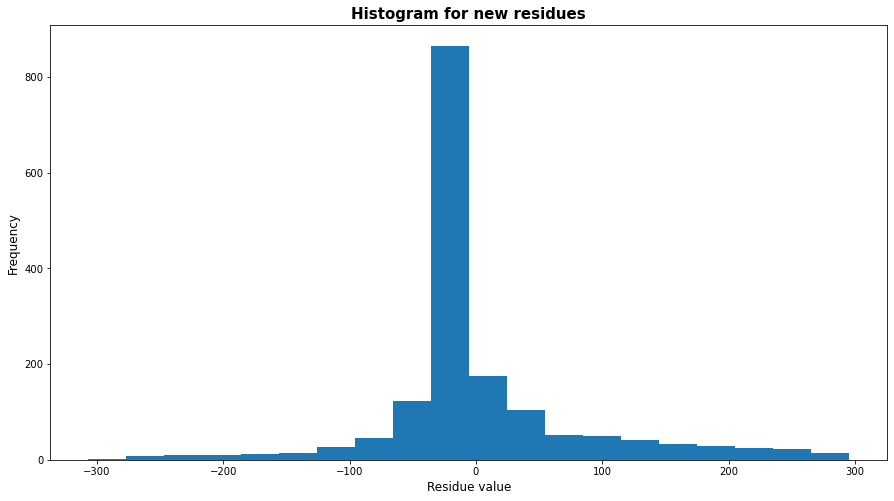

In [40]:
#Find the new residue and plot the histogram
res1=Y1-y_new
plt.figure(figsize=(15,8))
plt.hist(res1,20);
plt.title('Histogram for new residues',fontsize=15,weight='bold');
plt.xlabel('Residue value',fontsize=12);
plt.ylabel('Frequency',fontsize=12);

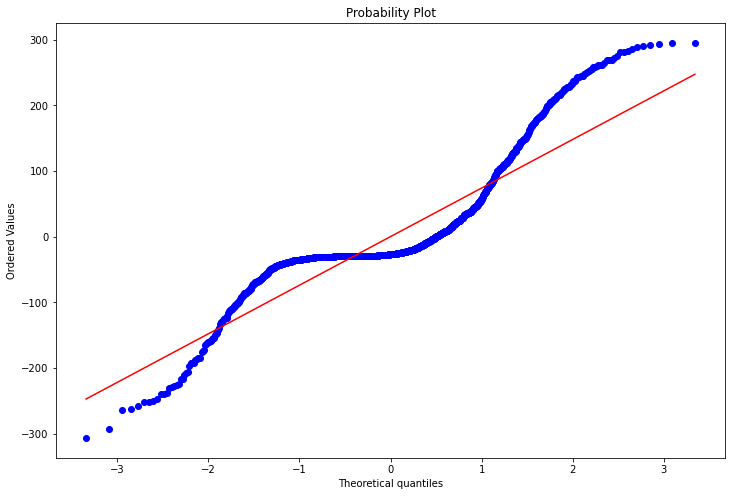

In [41]:
#Draw the probability plot
plt.figure(figsize=(12,8))
st.probplot(res1,plot=plt);

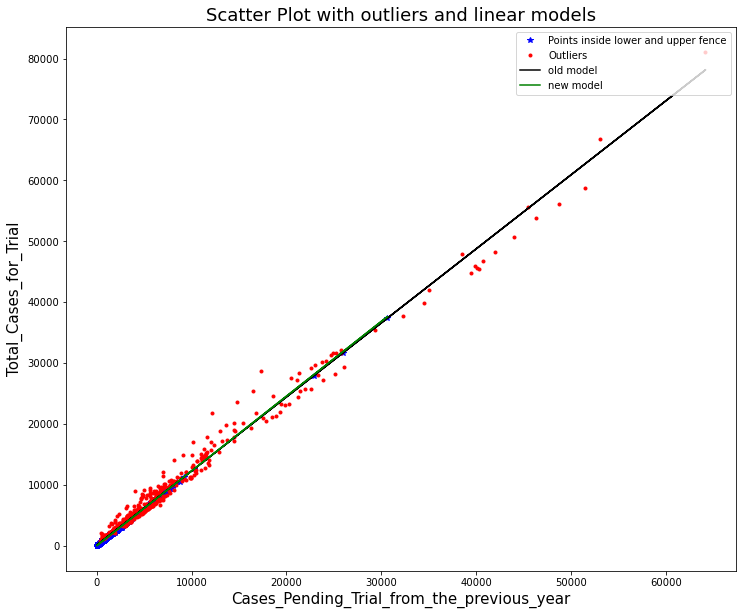

In [42]:
#Plot with outliers, the rest of the points, new and old linear models

plt.figure(figsize=(12,10));                              

a=plt.plot(X1,Y1, 'b*', label="Points inside lower and upper fence");
b=plt.plot(Y2['Cases_Pending_Trial_from_the_previous_year'], Y2['Total_Cases_for_Trial'], 'r.', label='Outliers');
c=plt.plot(X, y, 'k', label='old model');
d=plt.plot(X1,y_new,'g',label='new model');  

plt.title('Scatter Plot with outliers and linear models',fontsize=18); 
plt.xlabel("Cases_Pending_Trial_from_the_previous_year",fontsize=15);      
plt.ylabel("Total_Cases_for_Trial",fontsize=15);                                               

plt.legend(loc='upper right'); 